In [11]:
!pip install statsmodels scikit-learn


✅ Data Loaded Successfully

Missing values:
 Exchange_Rate    0
dtype: int64


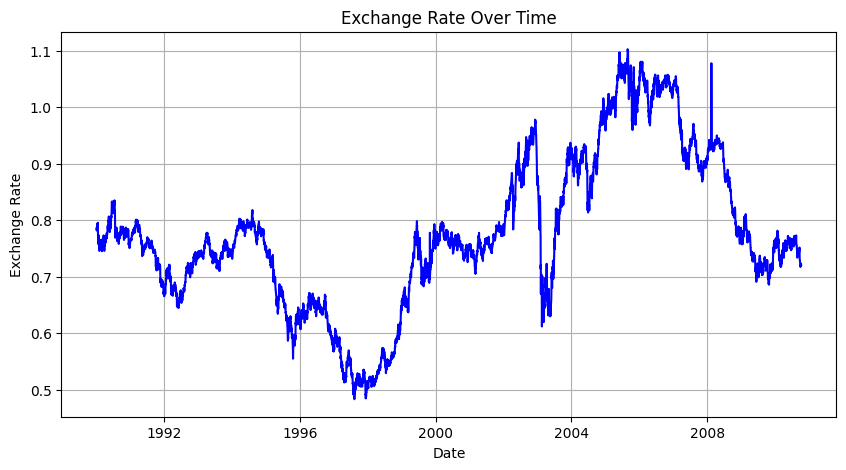

Train size: 6070, Test size: 1518

🔹 ARIMA MODEL 🔹
                               SARIMAX Results                                
Dep. Variable:          Exchange_Rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Sat, 08 Nov 2025   AIC                         -45432.092
Time:                        15:27:16   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5972      0.062     -9.648      0.000      -0.719      -0.476
ma.L1          0.5398      0.064      8.430      0.000       0.414       0.665
s

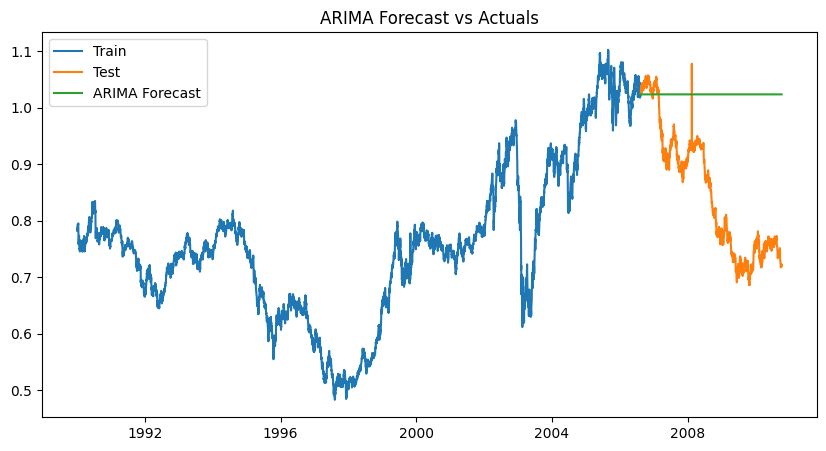


🔹 EXPONENTIAL SMOOTHING MODEL 🔹


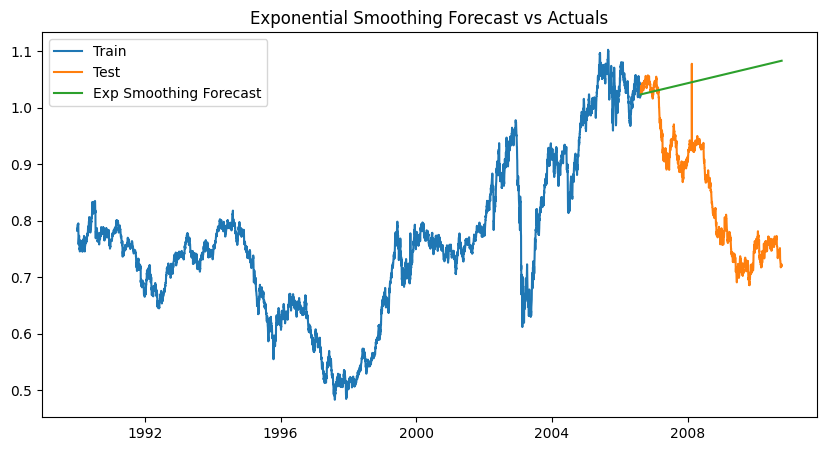


📊 MODEL PERFORMANCE COMPARISON
ARIMA - MAE: 0.1777, RMSE: 0.2054, MAPE: 22.80%
Exp Smoothing - MAE: 0.2066, RMSE: 0.2391, MAPE: 26.51%

✅ ARIMA model performs better for this dataset.


In [12]:
# Assignment 17 – Time Series Forecasting
# As per ExcelR instructions (ARIMA & Exponential Smoothing)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# 1️⃣ Load Dataset
df = pd.read_csv('/content/exchange_rate (1).csv')
print("✅ Data Loaded Successfully")
df.head()

# 2️⃣ Convert Date column to datetime (adjust name if needed)
df.columns = df.columns.str.strip()
df.rename(columns={df.columns[0]: 'Date', df.columns[1]: 'Exchange_Rate'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')
df.set_index('Date', inplace=True)

# 3️⃣ Check for missing values
print("\nMissing values:\n", df.isna().sum())

# 4️⃣ Plot the data
plt.figure(figsize=(10,5))
plt.plot(df['Exchange_Rate'], color='blue')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

# 5️⃣ Train-Test Split (80-20)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]
print(f"Train size: {len(train)}, Test size: {len(test)}")

# 6️⃣ ARIMA Model
print("\n🔹 ARIMA MODEL 🔹")
model_arima = ARIMA(train['Exchange_Rate'], order=(1,1,1))
arima_result = model_arima.fit()
print(arima_result.summary())

# Forecast
forecast_arima = arima_result.forecast(steps=len(test))
plt.figure(figsize=(10,5))
plt.plot(train['Exchange_Rate'], label='Train')
plt.plot(test['Exchange_Rate'], label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.title('ARIMA Forecast vs Actuals')
plt.legend()
plt.show()

# 7️⃣ Exponential Smoothing
print("\n🔹 EXPONENTIAL SMOOTHING MODEL 🔹")
model_es = ExponentialSmoothing(train['Exchange_Rate'], trend='add', seasonal=None)
es_result = model_es.fit()
forecast_es = es_result.forecast(len(test))

plt.figure(figsize=(10,5))
plt.plot(train['Exchange_Rate'], label='Train')
plt.plot(test['Exchange_Rate'], label='Test')
plt.plot(test.index, forecast_es, label='Exp Smoothing Forecast')
plt.title('Exponential Smoothing Forecast vs Actuals')
plt.legend()
plt.show()

# 8️⃣ Evaluation Metrics
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

mae_arima, rmse_arima, mape_arima = evaluate(test['Exchange_Rate'], forecast_arima)
mae_es, rmse_es, mape_es = evaluate(test['Exchange_Rate'], forecast_es)

print("\n📊 MODEL PERFORMANCE COMPARISON")
print(f"ARIMA - MAE: {mae_arima:.4f}, RMSE: {rmse_arima:.4f}, MAPE: {mape_arima:.2f}%")
print(f"Exp Smoothing - MAE: {mae_es:.4f}, RMSE: {rmse_es:.4f}, MAPE: {mape_es:.2f}%")

# 9️⃣ Conclusion
if rmse_arima < rmse_es:
    print("\n✅ ARIMA model performs better for this dataset.")
else:
    print("\n✅ Exponential Smoothing performs better for this dataset.")